In [2]:
from scrapy import Selector
import requests
import pandas as pd
import re

In [3]:
url= "https://editorial.rottentomatoes.com/guide/essential-movies-to-watch-now/"

In [4]:
r=requests.get(url).content

In [5]:
sel = Selector(text=r)

Extract movie URL

In [6]:
movie_name= sel.css('#row-index-1 > div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-title-bar > div.col-sm-20.col-full-xs > div > div > h2 > a::text').extract()[0]
    
print(movie_name)


12 Angry Men


### Find a way to get all href for movies using class

In [7]:
sel.css('#row-index-1 > div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-title-bar > div.col-sm-20.col-full-xs > div > div > h2 > a').extract()

['<a href="https://www.rottentomatoes.com/m/1000013_12_angry_men">12 Angry Men</a>']

In [8]:
movie_url= sel.css('div.row.countdown-item> div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-title-bar > div.col-sm-20.col-full-xs > div > div > h2 > a ::attr(href)').extract()

In [ ]:
sel.css('div.row.countdown-item> div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-title-bar > div.col-sm-20.col-full-xs > div > div > h2 > a ::attr(href)').extract()

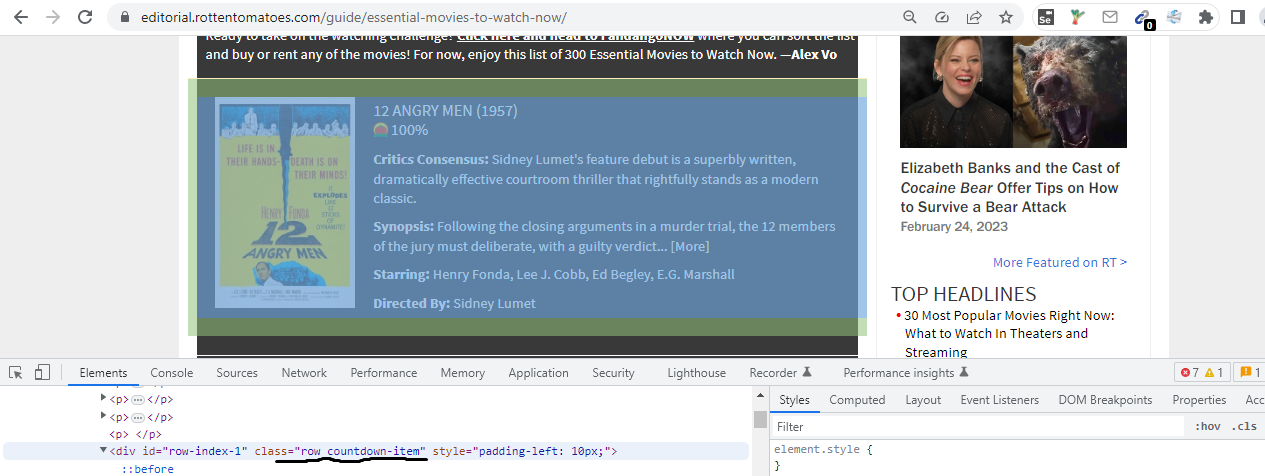

### Note
we replaced space with . in class attribute name to gell all classes the extract href

### Find a way to get all href for movies using id

In [10]:
movie_url= sel.css('div[id*="row-index"]> div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-title-bar > div.col-sm-20.col-full-xs > div > div > h2 > a ::attr(href)').extract()

https://www.cheat-sheets.org/saved-copy/Locators_table_1_0_2.pdf

From that cheat sheet we can find a way to get all div that has id contains row-index

In [11]:
url= "https://editorial.rottentomatoes.com/guide/essential-movies-to-watch-now/"
pages=[1,2]
movie_url_list=[]
for page in range(len(pages)):
    r=requests.get(url+str(page+1)+'/').content
    sel = Selector(text = r)
    movie_url= sel.css('div[id*="row-index"]> div.col-sm-18.col-full-xs.countdown-item-content > div.row.countdown-item-title-bar > div.col-sm-20.col-full-xs > div > div > h2 > a ::attr(href)').extract()
    for movie in movie_url:
        movie_url_list.append(movie)

In [12]:
len(movie_url_list)

300

In [15]:
#test
movie_url_list[-1]

'https://www.rottentomatoes.com/m/zero_dark_thirty'

## Test cells to get movie data

Watch the steps from [here](https://www.youtube.com/watch?v=o4K-Psr_gJs)

In [18]:
r = requests.get(movie_url_list[1]).content
sel = Selector(text=r)
movie_name= sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > h1::text').extract()[0]
audience_score = sel.css('score-board ::attr(audiencescore)').extract()[0]
audience_rating = sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > a.scoreboard__link.scoreboard__link--audience::text').extract()[0].strip()[:-9].replace(',','')
rt_score = sel.css('score-board ::attr(tomatometerscore)').extract()[0]
rt_reviwers=sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > a.scoreboard__link.scoreboard__link--tomatometer::text').extract()[0].strip()[:-8].replace(',','')
genre= sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > p::text').extract()[0].split(',')[1]
release = sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > p::text').extract()[0].split(',')[0]
duration = sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > p::text').extract()[0].split(',')[2]

#convert duration from text to minutes
time= duration.split()
x=1
if len(time) == x :
    time = int(re.findall(r'\d+', time[0])[0])*60
else:
    time=int(re.findall(r'\d+', time[0])[0])*60 + int (re.findall(r'\d+', time[1])[0])

movie_info=sel.css('#movieSynopsis::text').extract()[0].strip()
rating= retrive(sel, 'Rating:')
language= retrive(sel, 'Original Language:')
director= retrive(sel, 'Director:')
producer= retrive(sel, 'Producer:')

# 
if len(producer) > 1:
    producer = producer[0] + ', ' + producer[1]
else:
    producer=producer[0]
    
writer= sel.css('ul.content-meta.info>li:nth-of-type(5)>div:nth-of-type(2)>a ::text').extract()
if len(writer) > 1:
    writer = writer[0] + ', ' + witer[1]
else:
    writer=writer[0]
    


print(language)

English


In [40]:
sel.css('ul.content-meta.info >li')[2].extract()

'<li class="meta-row clearfix" data-qa="movie-info-item">\n                    <div class="meta-label subtle" data-qa="movie-info-item-label">Original Language:</div>\n                    <div class="meta-value" data-qa="movie-info-item-value">English\n                    </div>\n                </li>'

## Don't Repeat Your Self

Create function to get below data

- Rating
- language
- director
- producer
- writer

In [17]:
def retrive(sel, key):
        """ function to retive 
        Rating, Language, Director, Producer and writer
        
        Paramters:
            sel: selector of movie page
            key: key to search for needed data
            
        Returns:
        """
    for sel_elem in sel.css('ul.content-meta.info >li'):
        if sel_elem.css('div.meta-label.subtle::text').extract()[0] == key:
            list_of_text= [e.strip().replace('\n', '') for e in sel_elem.css('div.meta-value ::text').extract() if e !=""]
            if ',' in list_of_text:
                value =[e  for e in list_of_text if e not in ["", ',']][0] + ', ' + [e  for e in list_of_text if e not in ["", ',']][1]
                #print(value)
            else:
                value = [e  for e in list_of_text if e not in ["", ',']][0]
                #print(value)
            return value

In [ ]:
#test
retrive(sel, 'Director:')

## Loop over all pages after solving all problem in test phase
- If you face any error get the page that cause error 
- Start to test why error happened in test cell
- Add the needed steps to overcome the error and get needed data below

In [ ]:
top_300=[]
for movie_url in movie_url_list:
    r = requests.get(movie_url).content
    sel = Selector(text=r)
    rank = movie_url_list.index(movie_url)+1
    movie_name= sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > h1::text').extract()[0]
    audience_score = sel.css('score-board ::attr(audiencescore)').extract()[0]
    audience_rating = sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > a.scoreboard__link.scoreboard__link--audience::text').extract()[0].strip()[:-9].replace(',','')
    rt_score = sel.css('score-board ::attr(tomatometerscore)').extract()[0]
    rt_reviwers=sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > a.scoreboard__link.scoreboard__link--tomatometer::text').extract()[0].strip()[:-8].replace(',','')
    genre= sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > p::text').extract()[0].split(',')[1]
    release = sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > p::text').extract()[0].split(',')[0]
    duration = sel.css('#topSection > div.thumbnail-scoreboard-wrap > score-board > p::text').extract()[0].split(',')[2]

    #convert duration from text to minutes
    time= duration.split()
    x=1
    if len(time) == x :
        time_min = int(re.findall(r'\d+', time[0])[0])*60
    else:
        time_min=int(re.findall(r'\d+', time[0])[0])*60 + int (re.findall(r'\d+', time[1])[0])

    movie_info=sel.css('#movieSynopsis::text').extract()[0].strip()
    rating= retrive(sel, 'Rating:')
    language= retrive(sel, 'Original Language:')
    director= retrive(sel, 'Director:')
    producer= retrive(sel, 'Producer:')


  
    top_300.append({
                     'rank':rank,
                    'name': movie_name,
                    'critics_score' : int(rt_score),
                    'critics_review_numbers' : int(rt_reviwers),
                    'audience_score' : int(audience_score),
                    'audience_reviews' :(audience_rating),
                    'year' : int(release),
                    'genre' : genre,
                    'duration' : duration,
                    'time_in_minutes' : time_min,
                    'movie_page' : movie_url,
                    'language': language,
                    'director': director,
                    'producer':producer,
                    'writer': writer
                    })

df=pd.DataFrame(top_300, columns=['rank','name','critics_score','critics_review_numbers','audience_score', 'audience_reviews',
                                  'year','genre', 'duration','time_in_minutes', 'movie_page', 'language', 'director', 
                                  'producer', 'writer'])
df.head()

In [ ]:
len(top_300)